In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

target_list = ['readmission', 'mortality', 'los>3day', 'los>7day', 'dx_depth1_unique']

targets_noRead = ['mortality', 'los>3day', 'los>7day', 'dx_depth1_unique']


datasizedep = pd.read_csv('C:/Users/jiyou/Downloads/pool_with_base.csv')
base_line = pd.read_csv('C:/Users/jiyou/Downloads/pool_base_line.csv')

In [ ]:
base_file = base_file.loc[:,['bert_induced','bert_model','few_shot','item','seed','source_file','target','test_auprc']]
groupcheck2 = base_file.groupby(['source_file','target','item','few_shot','bert_induced','seed']).agg('count')

In [21]:
base_file = base_line
base_file = base_file.drop('seed', axis=1)
grouped2 = base_file.groupby(['source_file','target','item','few_shot','bert_induced']).agg(['mean','std'])
sample2 = grouped2.loc[('eicu', 'mortality', 'all')].reset_index(level=['few_shot','bert_induced'], col_level=1)

In [22]:
sample2

Tags     Runtime             Sweep     batch_size  \
   few_shot bert_induced mean std    mean         std  mean std       mean   
0       0.1        False  NaN NaN   609.0  503.300440   NaN NaN        512   
1       0.1         True  NaN NaN   371.3  223.137252   NaN NaN        512   
2       0.3        False  NaN NaN   398.8  213.287391   NaN NaN        512   
3       0.3         True  NaN NaN   443.7  129.794753   NaN NaN        512   
4       0.5        False  NaN NaN   423.6  135.604163   NaN NaN        512   
5       0.5         True  NaN NaN   405.6   84.305265   NaN NaN        512   
6       0.7        False  NaN NaN   485.7  140.609823   NaN NaN        512   
7       0.7         True  NaN NaN   451.9  135.036168   NaN NaN        512   
8       0.9        False  NaN NaN   448.1  125.083483   NaN NaN        512   
9       0.9         True  NaN NaN   435.1   58.325619   NaN NaN        512   
10      1.0        False  NaN NaN   509.7  174.346430   NaN NaN        512   
11      1.0         True  NaN NaN   496.0   62.223611   NaN NaN        512   

         ... eicu_test_auroc     eicu_test_loss     mimic_test_auprc      \
    std  ...            mean std           mean std             mean std   
0   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
1   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
2   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
3   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
4   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
5   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
6   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
7   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
8   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
9   0.0  ...             NaN NaN            NaN NaN              NaN NaN   
10  0.0  ...             NaN NaN            NaN NaN              NaN NaN   
11  0.0  ...             NaN NaN            NaN NaN              NaN NaN   

   mimic_test_auroc     mimic_test_loss      
               mean std            mean std  
0               NaN NaN             NaN NaN  
1               NaN NaN             NaN NaN  
2               NaN NaN             NaN NaN  
3               NaN NaN             NaN NaN  
4               NaN NaN             NaN NaN  
5               NaN NaN             NaN NaN  
6               NaN NaN             NaN NaN  
7               NaN NaN             NaN NaN  
8               NaN NaN             NaN NaN  
9               NaN NaN             NaN NaN  
10              NaN NaN             NaN NaN  
11              NaN NaN             NaN NaN  

[12 rows x 90 columns]

In [23]:
BERT2 = sample2.loc[sample.iloc[:,1]]

NameError: name 'sample' is not defined

In [33]:
def datasize_dep_plot(result_file:pd.DataFrame, base_file, test_file, item, target, subplot_index):
    
    result_file = result_file.loc[:,['bert_induced','bert_model','few_shot','item','seed','test_file','target','test_auprc']]
    base_file = base_file.loc[:,['bert_induced','bert_model','few_shot','item','seed','source_file','target','test_auprc']]
    
    # Assert error if one seed is present more than once per cell
    groupcheck = result_file.groupby(['test_file','target','item','few_shot','bert_induced','seed']).agg('count')
    groupcheck2 = base_file.groupby(['source_file','target','item','few_shot','bert_induced','seed']).agg('count')
    assert not (any([any(groupcheck[i]>1) for i in groupcheck.columns])), 'Overlapping seeds'
    assert not (any([any(groupcheck2[i]>1) for i in groupcheck2.columns])), 'Overlapping seeds'
    # Assert error if more than 10 seeds for single category 
    groupcheck = result_file.groupby(['test_file','target','item','few_shot','bert_induced']).agg('count')
    groupcheck2 = base_file.groupby(['source_file','target','item','few_shot','bert_induced']).agg('count')
    assert not (any([any(groupcheck[i]>10) for i in groupcheck.columns])), 'At least one cell would aggregate >10 seeds'
    assert not (any([any(groupcheck2[i]>10) for i in groupcheck2.columns])), 'At least one cell would aggregate >10 seeds' 
    
    result_file = result_file.drop('seed', axis=1)
    base_file = base_file.drop('seed', axis=1)
    grouped = result_file.groupby(['test_file','target','item','few_shot','bert_induced']).agg(['mean','std'])
    grouped2 = base_file.groupby(['source_file','target','item','few_shot','bert_induced']).agg(['mean','std'])
    sample = grouped.loc[(test_file, target, item)].reset_index(level=['few_shot','bert_induced'], col_level=1)
    sample2 = grouped2.loc[(test_file, target, item)].reset_index(level=['few_shot','bert_induced'], col_level=1)

#     if source_file=='both':
#         sample = sample.drop('test_auprc', axis=1)
#     else:
#         sample = sample.drop(['eicu_test_auprc','mimic_test_auprc'],axis=1)

    # Messy, but the more "elegant" approach was giving me trouble
    BERT = sample.loc[sample.iloc[:,1]] # sample.iloc[:,1] is the "bert_induced" index...
    BERT2 = sample2.loc[sample2.iloc[:,1]]
    
    idx = pd.IndexSlice
    BERTfewshot_levels = BERT.loc[:,idx[:, 'few_shot']].values.flatten()
    BERTmeans = BERT.loc[:,('test_auprc','mean')].values
    BERTupper_sd = BERTmeans + BERT.loc[:,('test_auprc','std')].values
    BERTlower_sd = BERTmeans - BERT.loc[:,('test_auprc','std')].values
    
    BERTfewshot_levels2 = BERT2.loc[:,idx[:, 'few_shot']].values.flatten()
    BERTmeans2 = BERT2.loc[:,('test_auprc','mean')].values
    BERTupper_sd2 = BERTmeans2 + BERT2.loc[:,('test_auprc','std')].values
    BERTlower_sd2 = BERTmeans2 - BERT2.loc[:,('test_auprc','std')].values

    RNN = sample.loc[~sample.iloc[:,1]] # i.e. keep if bert_induced == False
    RNNfewshot_levels = RNN.loc[:,idx[:, 'few_shot']].values.flatten()
    RNNmeans = RNN.loc[:,('test_auprc','mean')].values
    RNNupper_sd = RNNmeans + RNN.loc[:,('test_auprc','std')].values
    RNNlower_sd = RNNmeans - RNN.loc[:,('test_auprc','std')].values

    # Before plotting, a couple of aesthetic things to address
    target_dict = {'readmission':'Readmission', 'mortality':'Mortality', 'los>3day':'LOS > 3 Days',
                   'los>7day':'LOS > 7 Days', 'dx_depth1_unique':'Diagnosis'}
    source_dict = {'eicu':'eICU', 'mimic':'MIMIC-III'}
    
    # Plot
    ax = fig.add_subplot(2, 3, subplot_index)
    
    # BERT induced
    ax.plot(BERTfewshot_levels, BERTmeans, color='crimson', label='DescEmb, with base')
    plt.fill_between(BERTfewshot_levels, BERTupper_sd, BERTlower_sd, facecolor='pink', alpha=0.5)
    ax.plot(BERTfewshot_levels2, BERTmeans2, color='darkblue', label='DescEmb, without base')
    plt.fill_between(BERTfewshot_levels2, BERTupper_sd2, BERTlower_sd2, facecolor='lightsteelblue', alpha=0.5)

     # singleRNN
#     ax.plot(RNNfewshot_levels, RNNmeans, color='darkblue', label='CodeEmb')
#     plt.fill_between(RNNfewshot_levels, RNNupper_sd, RNNlower_sd, facecolor='lightsteelblue', alpha=0.5)

    ax.set_xticks(BERTfewshot_levels, minor=False)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_xlabel('Proportion of Dataset')
    ax.set_ylabel('Test Set AUPRC')
    ax.grid(which='major', axis='x')
    ax.grid(which='major', axis='y')
    plt.title('{} Prediction'.format(target_dict[target]))

    # add
    if subplot_index == 5: # THIS ASSUMES 5 SUBPLOTS! CHANGE IF NEED BE
        plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
        
    fig.suptitle('Datasize Dependence in {} EHR'.format(source_dict[test_file]), fontsize=25)


KeyError: ('mimic', 'dx_depth1_unique', 'all')

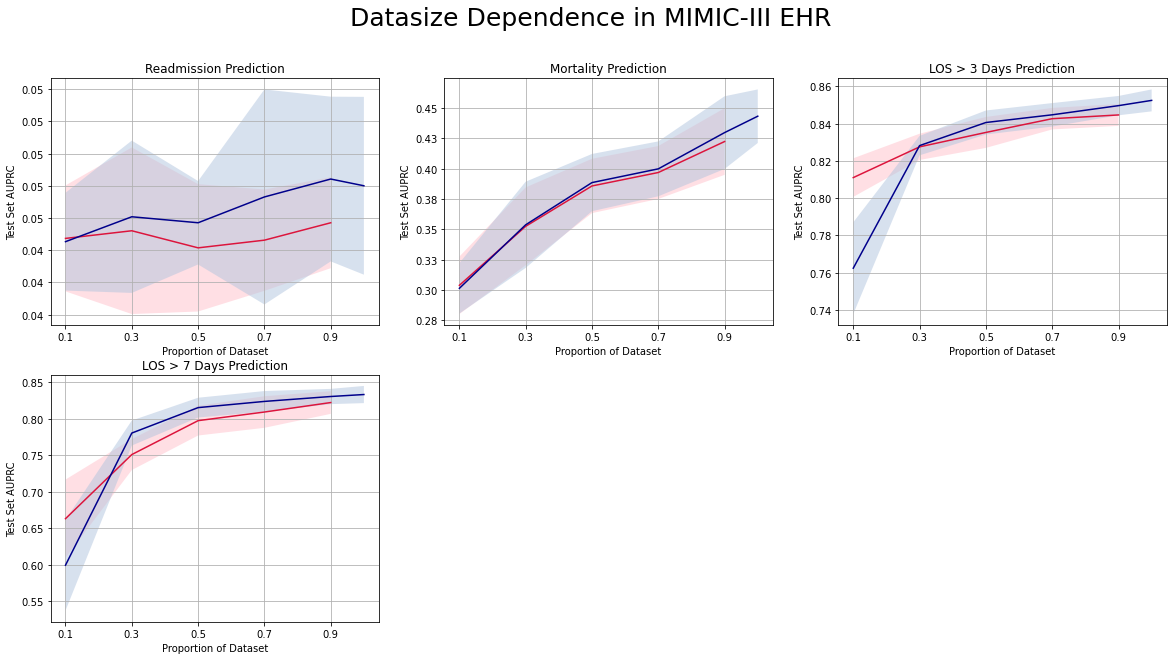

In [35]:
# For targets_noRead
#fig = plt.figure(figsize=(20*.75, 15*.75))
target_list = ['readmission', 'mortality', 'los>3day', 'los>7day', 'dx_depth1_unique']

# For target_list
fig = plt.figure(figsize=(20, 10))

for subplot, target in enumerate(target_list): 
    datasize_dep_plot(datasizedep, base_line, 'mimic', 'all', target, subplot_index=subplot+1)

/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(la

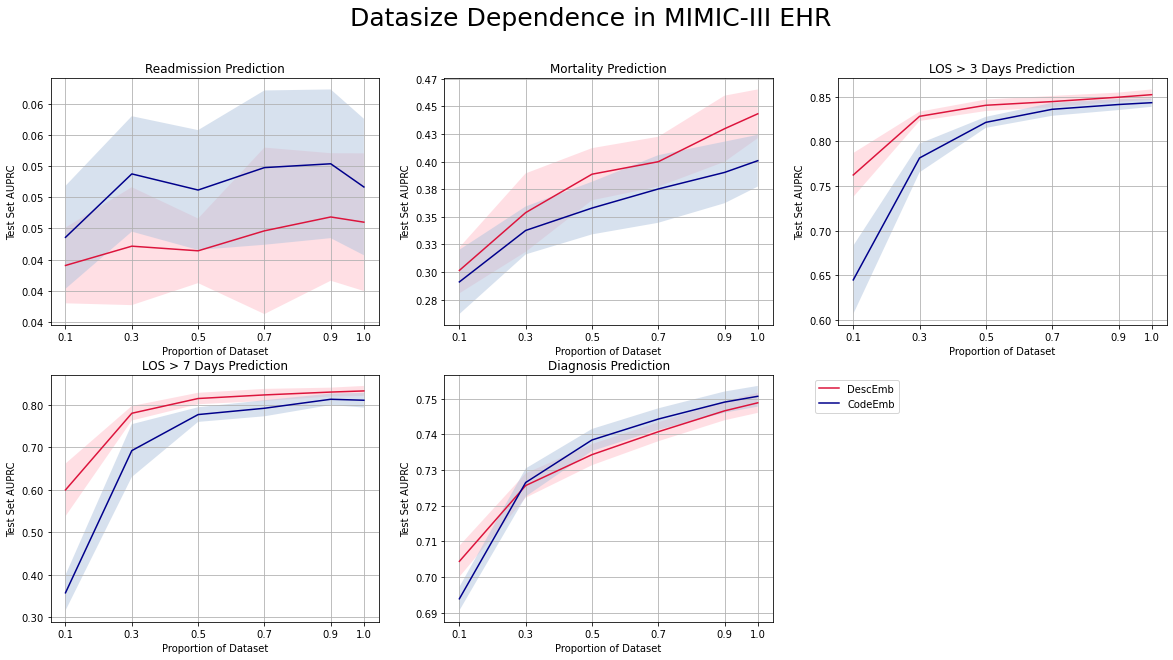

In [4]:
# For targets_noRead
#fig = plt.figure(figsize=(20*.75, 15*.75))

# For target_list
fig = plt.figure(figsize=(20, 10))

for subplot, target in enumerate(target_list): 
    datasize_dep_plot(datasizedep, 'mimic', 'all', target, subplot_index=subplot+1)
    
